# 📈 Linear Regression with Python

> Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:

> 1. Linear Regression
> 2. Robust Regression
> 3. Ridge Regression
> 4. LASSO Regression
> 5. Elastic Net
> 6. Polynomial Regression
> 7. Stochastic Gradient Descent
> 8. Artificial Neaural Networks

# 💾 Data

> We are going to use the `USA_Housing` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house


In [12]:
!pip install hvplot

# 📤 Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

## 💾 Check out the Data

In [4]:
USAhousing = pd.read_csv('/kaggle/input/usa-housing/USA_Housing.csv')
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [5]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [7]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# 📊 Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!

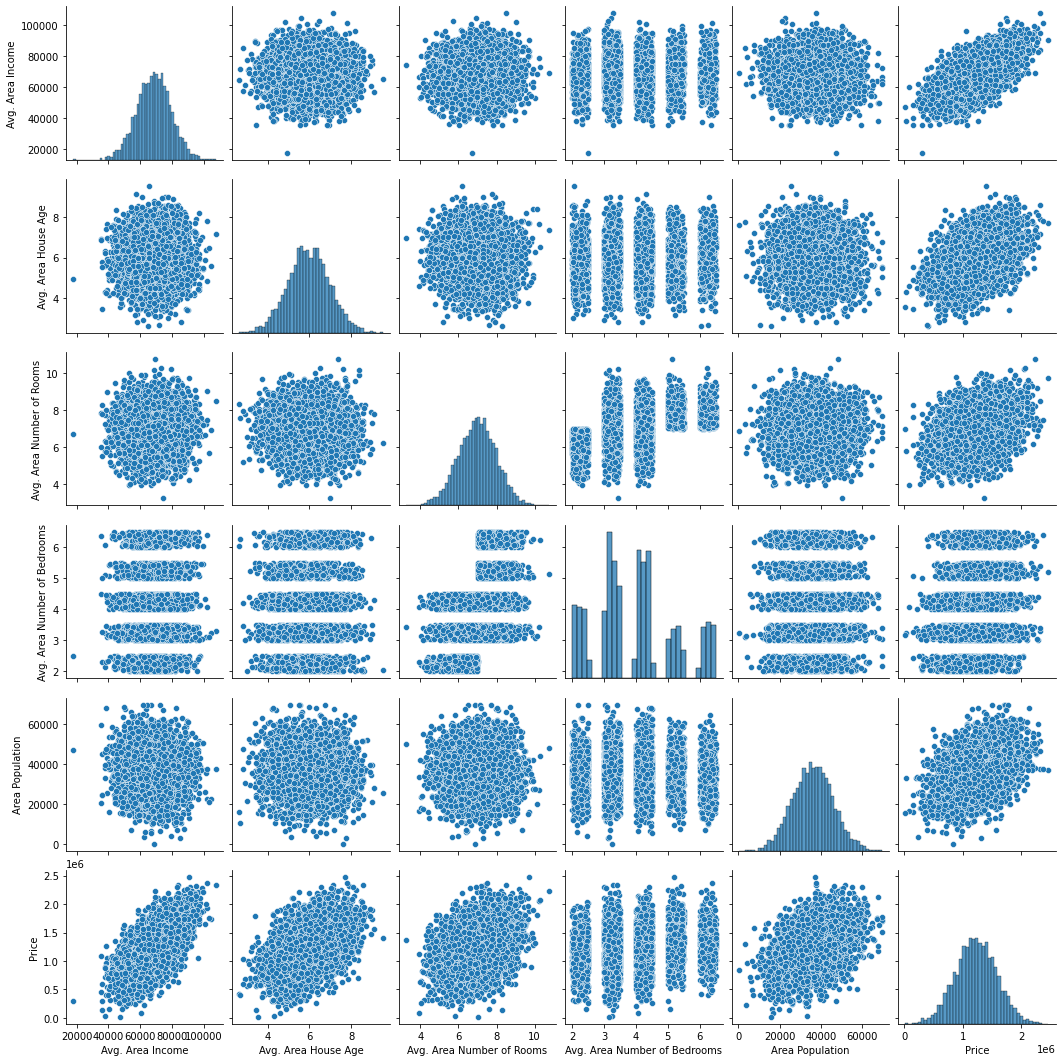

In [8]:
sns.pairplot(USAhousing)

In [26]:
USAhousing.hvplot.hist(by='Price', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Area Population]   (Area Population_count)

In [15]:
USAhousing.hvplot.hist("Price")

:Histogram   [Price]   (Price_count)

In [19]:
USAhousing.hvplot.scatter(x='Avg. Area House Age', y='Price')

:Scatter   [Avg. Area House Age]   (Price)

In [20]:
USAhousing.hvplot.scatter(x='Avg. Area Income', y='Price')

:Scatter   [Avg. Area Income]   (Price)

In [16]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<AxesSubplot:>

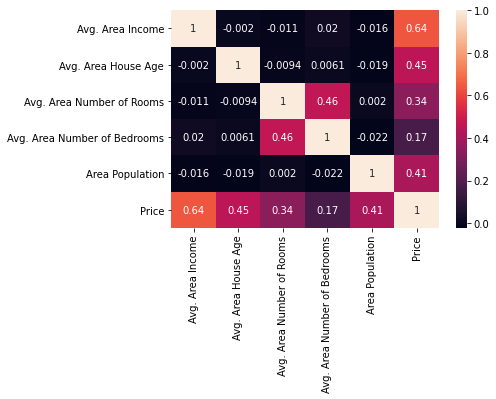

In [10]:
sns.heatmap(USAhousing.corr(), annot=True)

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

In [27]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# 📦 Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# ✔️ Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

## ✔️ Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [32]:
# print the intercept
print(lin_reg.intercept_)

1228219.1492415662


In [33]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income              232679.724643
Avg. Area House Age           163841.046593
Avg. Area Number of Rooms     121110.555478
Avg. Area Number of Bedrooms    2892.815119
Area Population               151252.342377

> Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15**.

Does this make sense? Probably not because I made up this data.

## ✔️ Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [34]:
pred = lin_reg.predict(X_test)

In [47]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histogram**

In [46]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [48]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


In [49]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model           MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   

   Cross Validation  
0          0.917379

# ✔️ Robust Regression

> Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

> One instance in which robust estimation should be considered is when there is a strong suspicion of `heteroscedasticity`.

> A common situation in which robust estimation is used occurs when the data contain outliers. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is inefficient and can be biased. Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. (In many situations, including some areas of geostatistics and medical statistics, it is precisely the outliers that are of interest.)

## Random Sample Consensus - RANSAC

> Random sample consensus (`RANSAC`) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

> A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

In [50]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 84645.31069259303
MSE: 10996805871.555056
RMSE: 104865.65630155115
R2 Square 0.9068148829222649
__________________________________
Train set evaluation:
_____________________________________
MAE: 84956.48056962446
MSE: 11363196455.35414
RMSE: 106598.29480509592
R2 Square 0.9108562888249323
__________________________________


In [51]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   
1  Robust Regression  84645.310693  1.099681e+10  104865.656302   0.906815   

   Cross Validation  
0          0.917379  
1          0.911225

# ✔️ Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

In [52]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
__________________________________
Train set evaluation:
_____________________________________
MAE: 81972.39058585509
MSE: 10382929615.14346
RMSE: 101896.66145239233
R2 Square 0.9185464334441484
__________________________________


In [53]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   
1  Robust Regression  84645.310693  1.099681e+10  104865.656302   0.906815   
2   Ridge Regression  81428.648355  1.015327e+10  100763.435337   0.913963   

   Cross Validation  
0          0.917379  
1          0.911225  
2          0.917379

# ✔️ LASSO Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

In [54]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364521
RMSE: 100341.68321472648
R2 Square 0.914681588551116
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545   0.914682   
1  Robust Regression  84645.310693  1.099681e+10  104865.656302   0.906815   
2   Ridge Regression  81428.648355  1.015327e+10  100763.435337   0.913963   
3   Lasso Regression  81135.698517  1.006845e+10  100341.683215   0.914682   

   Cross Validation  
0          0.917379  
1          0.911225  
2          0.917379  
3          0.917379

# ✔️ Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

In [56]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81184.43147330945
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
__________________________________
Train set evaluation:
_____________________________________
MAE: 81577.88831531754
MSE: 10299274948.101461
RMSE: 101485.34351373829
R2 Square 0.9192027001474953
__________________________________


In [57]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE           RMSE  \
0       Linear Regression  81135.566093  1.006842e+10  100341.529545   
1       Robust Regression  84645.310693  1.099681e+10  104865.656302   
2        Ridge Regression  81428.648355  1.015327e+10  100763.435337   
3        Lasso Regression  81135.698517  1.006845e+10  100341.683215   
4  Elastic Net Regression  81184.431473  1.007805e+10  100389.492321   

   R2 Square  Cross Validation  
0   0.914682          0.917379  
1   0.906815          0.911225  
2   0.913963          0.917379  
3   0.914682          0.917379  
4   0.914600          0.879545

# ✔️ Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119698
MSE: 10081983997.620703
RMSE: 100409.0832426066
R2 Square 0.9145669324195059
__________________________________
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007816
RMSE: 101323.67517519198
R2 Square 0.9194599187853729
__________________________________


In [59]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE           RMSE  \
0       Linear Regression  81135.566093  1.006842e+10  100341.529545   
1       Robust Regression  84645.310693  1.099681e+10  104865.656302   
2        Ridge Regression  81428.648355  1.015327e+10  100763.435337   
3        Lasso Regression  81135.698517  1.006845e+10  100341.683215   
4  Elastic Net Regression  81184.431473  1.007805e+10  100389.492321   
5   Polynomail Regression  81174.518441  1.008198e+10  100409.083243   

   R2 Square  Cross Validation  
0   0.914682          0.917379  
1   0.906815          0.911225  
2   0.913963          0.917379  
3   0.914682          0.917379  
4   0.914600          0.879545  
5   0.914567          0.000000

# ✔️ Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [60]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56682170597
MSE: 10068422777.172981
RMSE: 100341.53066987259
R2 Square 0.914681847962246
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.49901528798
MSE: 10287043161.228634
RMSE: 101425.06180046742
R2 Square 0.9192986579073061
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE           RMSE  \
0            Linear Regression  81135.566093  1.006842e+10  100341.529545   
1            Robust Regression  84645.310693  1.099681e+10  104865.656302   
2             Ridge Regression  81428.648355  1.015327e+10  100763.435337   
3             Lasso Regression  81135.698517  1.006845e+10  100341.683215   
4       Elastic Net Regression  81184.431473  1.007805e+10  100389.492321   
5        Polynomail Regression  81174.518441  1.008198e+10  100409.083243   
6  Stochastic Gradient Descent  81135.566822  1.006842e+10  100341.530670   

   R2 Square  Cross Validation  
0   0.914682          0.917379  
1   0.906815          0.911225  
2   0.913963          0.917379  
3   0.914682          0.917379  
4   0.914600          0.879545  
5   0.914567          0.000000  
6   0.914682          0.000000

# ✔️ Artficial Neural Network

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1666940493395.7979 - val_loss: 1658085965824.0000
Epoch 2/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1669652024954.4062 - val_loss: 1655989207040.0000
Epoch 3/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1647582137823.9727 - val_loss: 1646775107584.0000
Epoch 4/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1626038339744.8684 - val_loss: 1620746829824.0000
Epoch 5/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1574832030767.6755 - val_loss: 1561940590592.0000
Epoch 6/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1504217102072.1760 - val_loss: 1449720676352.0000
Epoch 7/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1368013466933.1597 - val_loss: 1262848311296.0000
Epoch 8/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1173280256651.6628 - val_loss: 992

In [ ]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [75]:
pd.DataFrame(r.history)

loss      val_loss
0   1.635957e+12  1.658086e+12
1   1.635103e+12  1.655989e+12
2   1.630094e+12  1.646775e+12
3   1.613685e+12  1.620747e+12
4   1.573279e+12  1.561941e+12
..           ...           ...
95  1.838528e+10  1.696610e+10
96  1.854836e+10  1.675970e+10
97  1.842890e+10  1.661113e+10
98  1.829494e+10  1.642330e+10
99  1.788783e+10  1.633171e+10

[100 rows x 2 columns]

In [76]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [64]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 101035.09313018023
MSE: 16331712517.46175
RMSE: 127795.58880282899
R2 Square 0.8616077649459881
__________________________________
Train set evaluation:
_____________________________________
MAE: 102671.5714851714
MSE: 17107402549.511665
RMSE: 130795.2695991398
R2 Square 0.8657932776379376
__________________________________


In [65]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression   81135.566093  1.006842e+10  100341.529545   
1            Robust Regression   84645.310693  1.099681e+10  104865.656302   
2             Ridge Regression   81428.648355  1.015327e+10  100763.435337   
3             Lasso Regression   81135.698517  1.006845e+10  100341.683215   
4       Elastic Net Regression   81184.431473  1.007805e+10  100389.492321   
5        Polynomail Regression   81174.518441  1.008198e+10  100409.083243   
6  Stochastic Gradient Descent   81135.566822  1.006842e+10  100341.530670   
7     Artficial Neural Network  101035.093130  1.633171e+10  127795.588803   

   R2 Square  Cross Validation  
0   0.914682          0.917379  
1   0.906815          0.911225  
2   0.913963          0.917379  
3   0.914682          0.917379  
4   0.914600          0.879545  
5   0.914567          0.000000  
6   0.914682          0.000000  
7   0.861608          0.000000

# ✔️ Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94032.15903928125
MSE: 14073007326.955029
RMSE: 118629.70676417871
R2 Square 0.8807476597554337
__________________________________
Train set evaluation:
_____________________________________
MAE: 35289.68268023927
MSE: 1979246136.9966476
RMSE: 44488.71921056671
R2 Square 0.9844729124701823
__________________________________


In [67]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression   81135.566093  1.006842e+10  100341.529545   
1            Robust Regression   84645.310693  1.099681e+10  104865.656302   
2             Ridge Regression   81428.648355  1.015327e+10  100763.435337   
3             Lasso Regression   81135.698517  1.006845e+10  100341.683215   
4       Elastic Net Regression   81184.431473  1.007805e+10  100389.492321   
5        Polynomail Regression   81174.518441  1.008198e+10  100409.083243   
6  Stochastic Gradient Descent   81135.566822  1.006842e+10  100341.530670   
7     Artficial Neural Network  101035.093130  1.633171e+10  127795.588803   
8      Random Forest Regressor   94032.159039  1.407301e+10  118629.706764   

   R2 Square  Cross Validation  
0   0.914682          0.917379  
1   0.906815          0.911225  
2   0.913963          0.917379  
3   0.914682          0.917379  
4   0.914600          0.879545  
5   0.914567          0.000000  
6   0.914682          0.000000  
7   0.861608          0.000000  
8   0.880748          0.000000

# ✔️ Support Vector Machine

In [68]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051021634
MSE: 11720932765.275513
RMSE: 108263.25676458987
R2 Square 0.9006787511983232
__________________________________
Train set evaluation:
_____________________________________
MAE: 73692.5684807321
MSE: 9363827731.411337
RMSE: 96766.87310960986
R2 Square 0.9265412370487783
__________________________________


In [69]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model            MAE           MSE           RMSE  \
0            Linear Regression   81135.566093  1.006842e+10  100341.529545   
1            Robust Regression   84645.310693  1.099681e+10  104865.656302   
2             Ridge Regression   81428.648355  1.015327e+10  100763.435337   
3             Lasso Regression   81135.698517  1.006845e+10  100341.683215   
4       Elastic Net Regression   81184.431473  1.007805e+10  100389.492321   
5        Polynomail Regression   81174.518441  1.008198e+10  100409.083243   
6  Stochastic Gradient Descent   81135.566822  1.006842e+10  100341.530670   
7     Artficial Neural Network  101035.093130  1.633171e+10  127795.588803   
8      Random Forest Regressor   94032.159039  1.407301e+10  118629.706764   
9                SVM Regressor   87205.730510  1.172093e+10  108263.256765   

   R2 Square  Cross Validation  
0   0.914682          0.917379  
1   0.906815          0.911225  
2   0.913963          0.917379  
3   0.914682          0.917379  
4   0.914600          0.879545  
5   0.914567          0.000000  
6   0.914682          0.000000  
7   0.861608          0.000000  
8   0.880748          0.000000  
9   0.900679          0.000000

# 📊 Models Comparison

<AxesSubplot:ylabel='Model'>

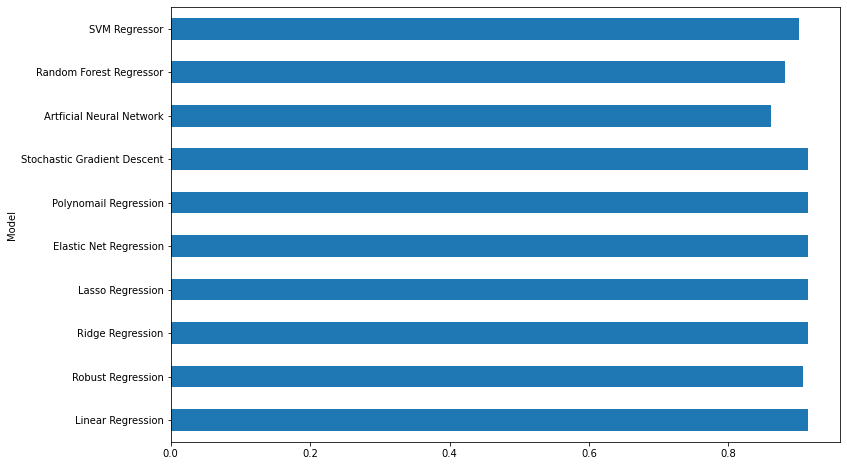

In [70]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# 📝 Summary
In this notebook you discovered the linear regression algorithm for machine learning.

You covered a lot of ground including:
> - The common linear regression models (Ridge, Lasso, ElasticNet, ...).
> - The representation used by the model.
> - Learning algorithms used to estimate the coefficients in the model.
> - Rules of thumb to consider when preparing data for use with linear regression.
> - How to evaluate a linear regression model.


# 🔗 References:
- [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)